In [9]:
#Linear regression is a statistical method used to find the relationship between one dependent variable (output) and one or more independent variables (inputs) by fitting a straight line through the data points.

#✅ Goal:
#To find the best-fitting straight line (called the regression line) that predicts the output variable as accurately as possible from the input variable(s).

#the main aim is to develop a machine learnii

In [10]:
%pip install xgboost

import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor


import warnings 
warnings.filterwarnings('ignore')




Note: you may need to restart the kernel to use updated packages.


In [11]:

df=pd.read_csv('boxoffice.csv')
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170
2693,Interstellar,158336835,77904664,Universal,132903825,3914,93959844,PG-13,Comedy,170


In [12]:
 df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [13]:
df.shape

(2694, 10)

In [14]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [18]:
to_remove = ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

In [19]:
df.isnull().sum()*100/df.shape[0]

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [20]:
display(df.to_string()) 

'                         title  domestic_revenue   distributor  opening_theaters     budget   MPAA     genres  release_days\n0                 The Avengers           6026491  Warner Bros.               253  174687337      R  Animation            16\n1                      Titanic         169411543        Disney               122  103948486      G     Action           103\n2                Jurassic Park         107836098          Sony              3826  122104991  NC-17     Horror            89\n3                       Avatar          51433697        Disney              3868   46431596      G     Horror            85\n4                The Lion King         142791649  Warner Bros.              2934  203513696      R     Comedy           158\n5                    Star Wars         283757629     Universal              1216   39257068      R     Comedy           154\n6                       Frozen          37740374          Sony              4472   81033758  NC-17     Action            47\

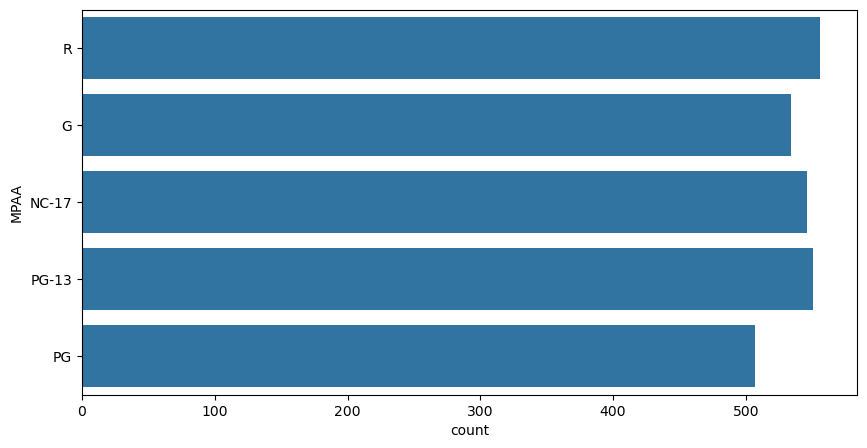

In [ ]:
#visualizing MPAA rating distribution
plt.figure(figsiz  =(10, 5))
sb.countplot(df['MPAA'])
plt.show()